In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

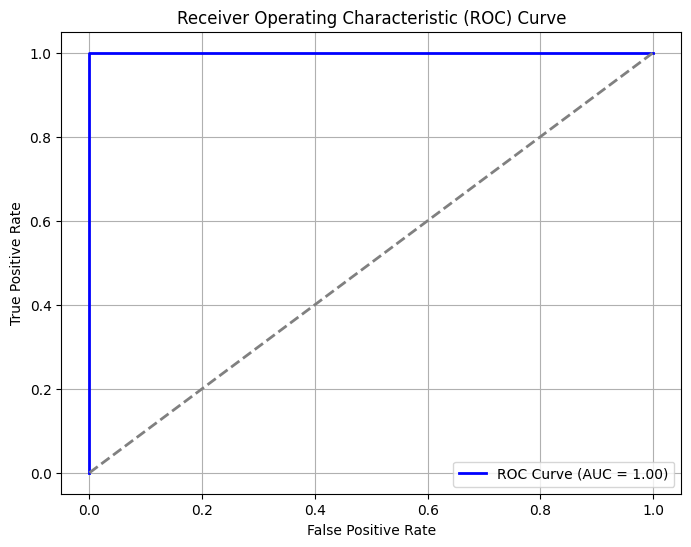

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define dummy data for demonstration
y_test = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]  # True labels
y_pred_prob = [0.1, 0.9, 0.8, 0.4, 0.95, 0.2, 0.3, 0.85, 0.7, 0.1]  # Predicted probabilities for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

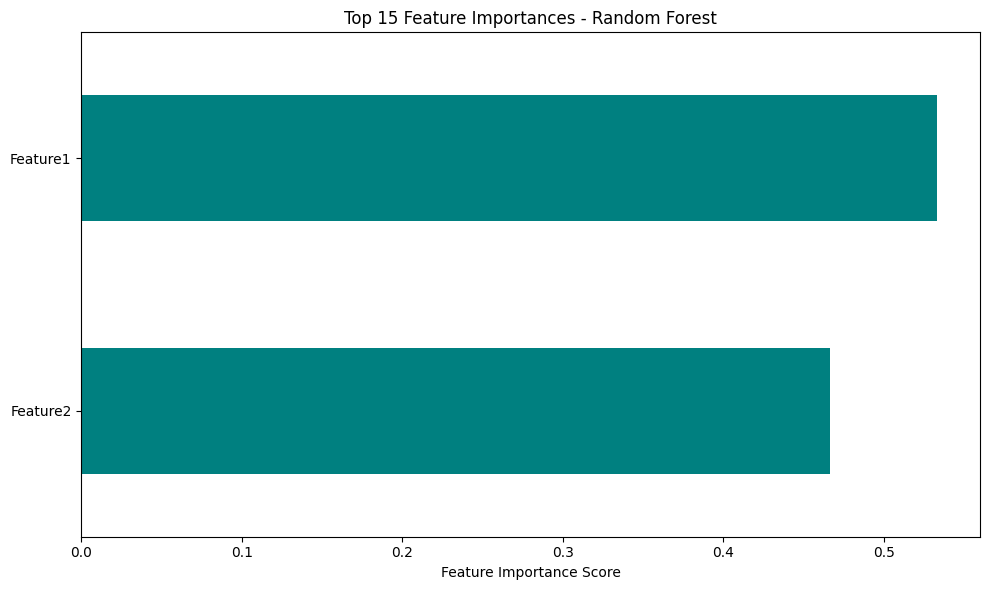

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset
data = pd.DataFrame({
	'Feature1': [1, 2, 3, 4, 5],
	'Feature2': [5, 4, 3, 2, 1],
	'Target': [0, 1, 0, 1, 0]
})

# Split the dataset into features and target
X = data[['Feature1', 'Feature2']]
y = data['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feat_importance.head(15).plot(kind='barh', color='teal')
plt.xlabel('Feature Importance Score')
plt.title('Top 15 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

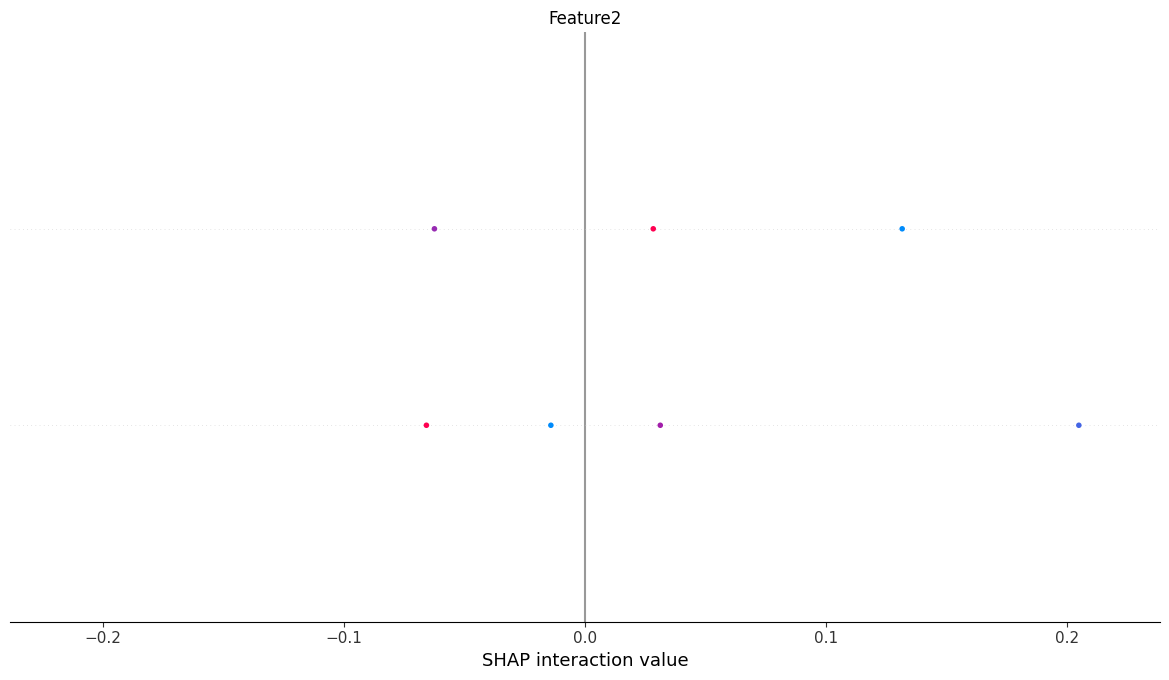

<Figure size 640x480 with 0 Axes>

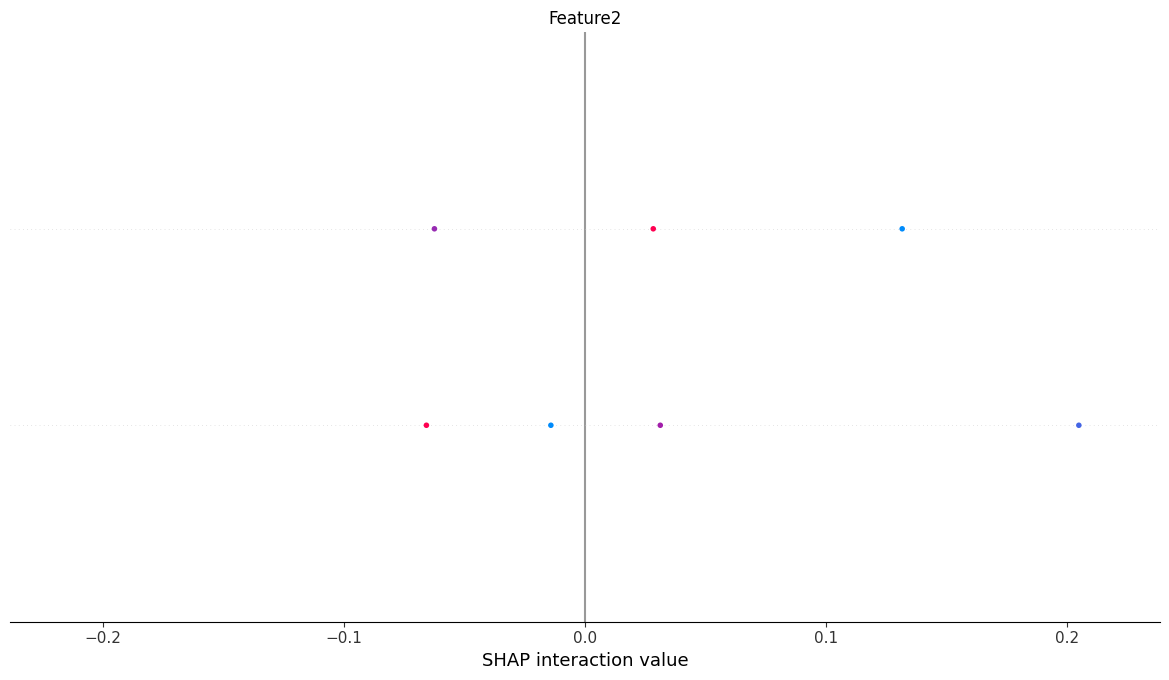

In [11]:
import shap

# Create explainer
explainer = shap.TreeExplainer(model)
# Compute SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Ensure the correct SHAP values are selected for the positive class (class 1)
if isinstance(shap_values, list):  # For models with multiple outputs
	shap_values_class = shap_values[1]  # Adjust this index based on your target class
else:
	shap_values_class = shap_values  # For models with a single output

# Plot global feature importance
shap.summary_plot(shap_values_class, X_train, plot_type="bar")
# Or full summary
shap.summary_plot(shap_values_class, X_train)


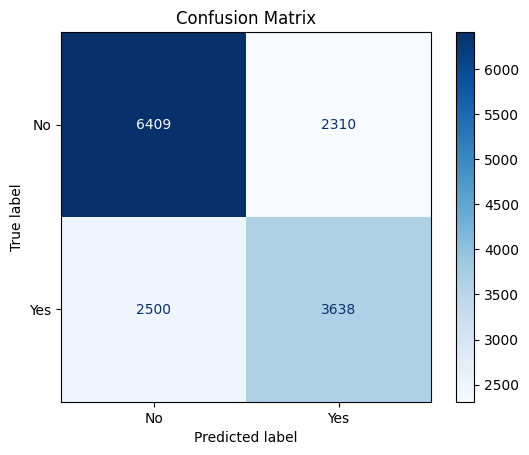

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('c:/users/Risha/Downloads/archive/alzheimers_prediction_dataset.csv')

# Replace 'Feature1', 'Feature2', and 'Target' with actual column names from your dataset
X = df[['Age', 'BMI']]  # Replace with actual feature columns
y = df['Alzheimer’s Diagnosis']  # Replace with the actual target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()